# Importing necessary Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Importing Data

In [2]:
data = pd.read_csv('parkinson_data.csv')
data

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

### Comparison of Average vocal fundamental frequency of Patients to Non-patients

In [5]:
parkinson_healthy = data.loc[data['status'] == 0]

In [6]:
len(parkinson_healthy)

48

In [7]:
parkinson_patient = data.loc[data['status'] == 1]

In [8]:
len(parkinson_patient)

147

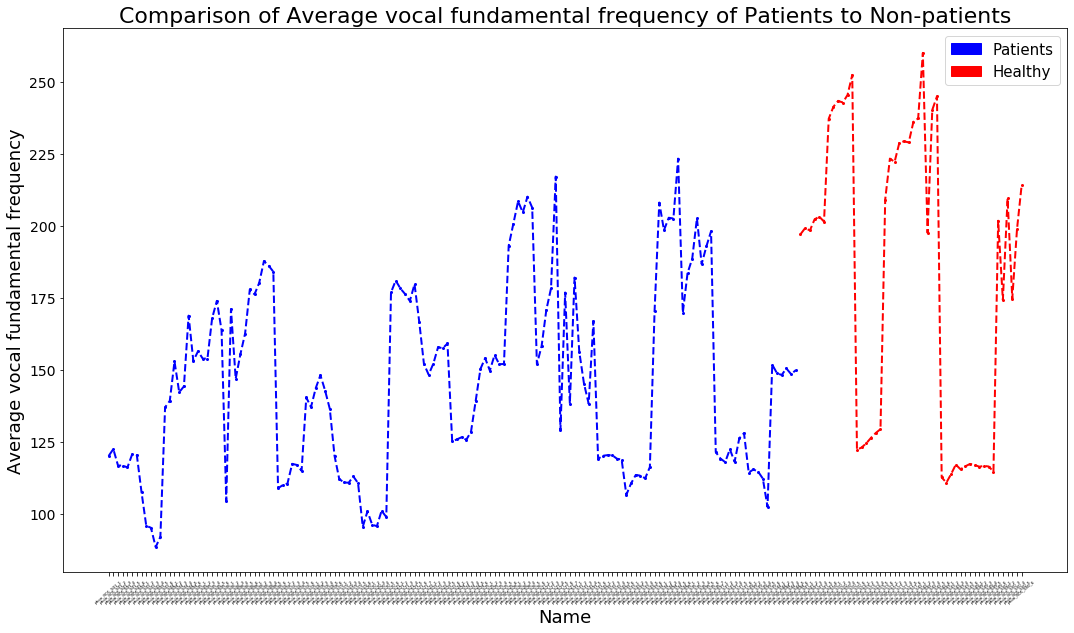

In [10]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['MDVP:Fo(Hz)'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['MDVP:Fo(Hz)'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('Average vocal fundamental frequency', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Comparison of Average vocal fundamental frequency of Patients to Non-patients', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

### Amplitude correlation between Patients and Non-patients

In [11]:
first_sample = parkinson_patient.sample(n = 48)

In [12]:
first_sample.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
22   phon_R01_S05_5      167.930       193.221        79.068         0.00442   
108  phon_R01_S25_6      151.989       157.339       132.857         0.00174   
26   phon_R01_S06_3      171.041       208.313        75.501         0.00455   
157  phon_R01_S37_5      117.963       134.209       100.757         0.01813   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
22            0.00003   0.00220   0.00247     0.00661       0.04351  ...   
108           0.00001   0.00075   0.00096     0.00225       0.01024  ...   
26            0.00003   0.00250   0.00234     0.00750       0.01966  ...   
157           0.00015   0.01117   0.00718     0.03351       0.04912  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
22       0.06685  0.01280  22.468       1  0.619060  0.679834 -4.330956   
108      0.01364  0.00238  29.928       1  0.311369  0.676066 -6.739151   
26       0.02666  0.01095  25.908       1  0.418622  0.720916 -6.183590   
157      0.07830  0.10748  19.075       1  0.630547  0.646786 -3.444478   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   

      spread2        D2       PPE  
22   0.262384  2.916777  0.285695  
108  0.160686  2.296873  0.115130  
26   0.226278  2.589702  0.147403  
157  0.303214  2.964568  0.261305  
1    0.335590  2.486855  0.368674  

[5 rows x 24 columns]

In [13]:
second_sample = parkinson_patient.sample(n = 48)

In [14]:
second_sample.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
54   phon_R01_S16_1      108.807       134.656       102.874         0.00761   
123  phon_R01_S31_2      182.018       197.173        79.187         0.00842   
112  phon_R01_S26_4      204.664       221.300       189.621         0.00841   
101  phon_R01_S24_5      128.451       150.449        75.632         0.01551   
161  phon_R01_S39_3      115.322       135.738       107.802         0.00619   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
54            0.00007   0.00349   0.00486     0.01046       0.02719  ...   
123           0.00005   0.00506   0.00449     0.01517       0.02503  ...   
112           0.00004   0.00502   0.00485     0.01506       0.02378  ...   
101           0.00012   0.00905   0.00909     0.02716       0.06170  ...   
161           0.00005   0.00352   0.00329     0.01057       0.03273  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
54       0.04450  0.01036  21.028       1  0.536009  0.819032 -4.649573   
123      0.04115  0.01813  18.784       1  0.589956  0.732903 -5.445140   
112      0.03831  0.01316  21.305       1  0.498877  0.722085 -4.876336   
101      0.09669  0.11843  15.060       1  0.639808  0.643327 -4.202730   
161      0.04933  0.02810  19.388       1  0.577802  0.684373 -5.283009   

      spread2        D2       PPE  
54   0.205558  1.986899  0.316700  
123  0.142466  2.174306  0.215558  
112  0.212054  2.376749  0.268144  
101  0.310163  2.638279  0.356881  
161  0.226528  2.442906  0.238281  

[5 rows x 24 columns]

In [15]:
third_sample = parkinson_patient.sample(n = 48)

In [16]:
third_sample.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
143  phon_R01_S34_4      202.805       231.508        86.232         0.00370   
105  phon_R01_S25_3      149.689       160.368       133.608         0.00257   
38   phon_R01_S08_3      180.198       201.249       175.456         0.00284   
107  phon_R01_S25_5      151.884       157.765       133.751         0.00258   
104  phon_R01_S25_2      154.003       160.267       128.621         0.00183   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
143           0.00002   0.00189   0.00211     0.00568       0.01997  ...   
105           0.00002   0.00116   0.00134     0.00349       0.01346  ...   
38            0.00002   0.00153   0.00166     0.00459       0.01444  ...   
107           0.00002   0.00115   0.00122     0.00346       0.01450  ...   
104           0.00001   0.00076   0.00100     0.00229       0.01030  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
143      0.03350  0.02010  18.687       1  0.536102  0.632631 -5.898673   
105      0.01979  0.00578  27.421       1  0.365488  0.719974 -6.997403   
38       0.02177  0.00231  26.738       1  0.403884  0.766209 -6.452058   
107      0.01898  0.00659  26.833       1  0.393563  0.700246 -6.600023   
104      0.01406  0.00243  28.409       1  0.263654  0.691483 -7.111576   

      spread2        D2       PPE  
143  0.213353  2.470746  0.189032  
105  0.210279  1.994387  0.112878  
38   0.212294  2.269398  0.141929  
107  0.249172  2.499148  0.105306  
104  0.144780  2.065477  0.093193  

[5 rows x 24 columns]

In [17]:
concatenation = pd.concat([parkinson_healthy, first_sample])
random_sampling = concatenation.sample(n = 48)

In [18]:
second_concatenation = pd.concat([parkinson_healthy, second_sample])

In [19]:
third_concatenation = pd.concat([parkinson_healthy, third_sample])

#### First Sample

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]), <a list of 10 Text yticklabel objects>)

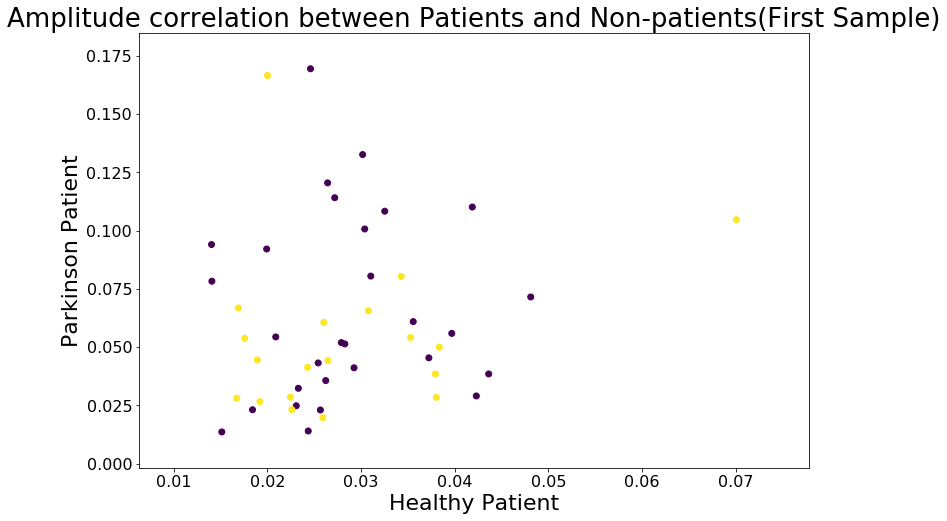

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], first_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(First Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Second Sample

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]), <a list of 10 Text yticklabel objects>)

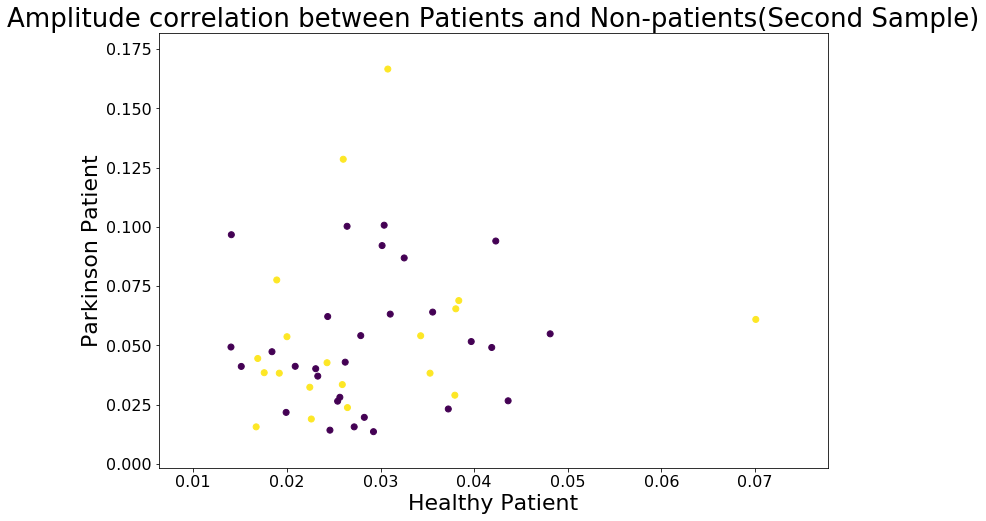

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], second_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(Second Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Third Sample

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]), <a list of 10 Text yticklabel objects>)

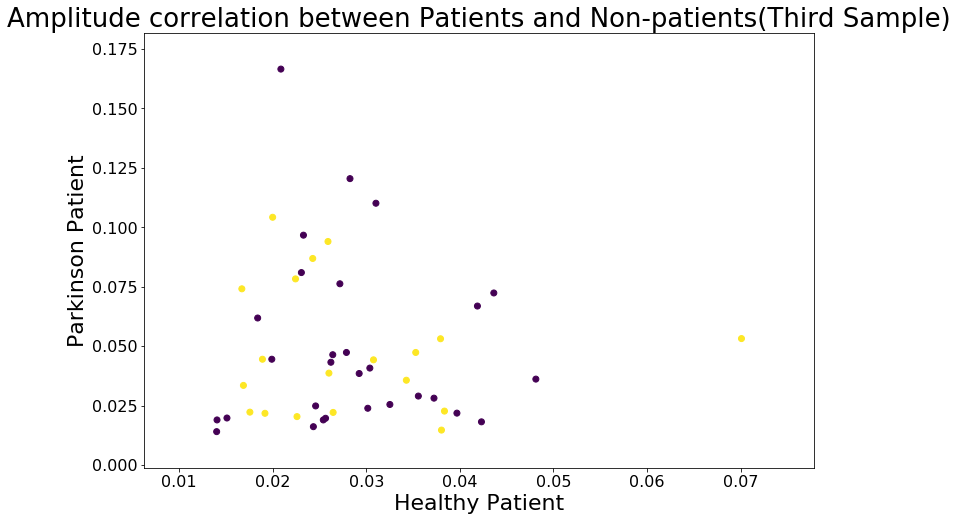

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], third_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(Third Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Confirming correlation with a line plot

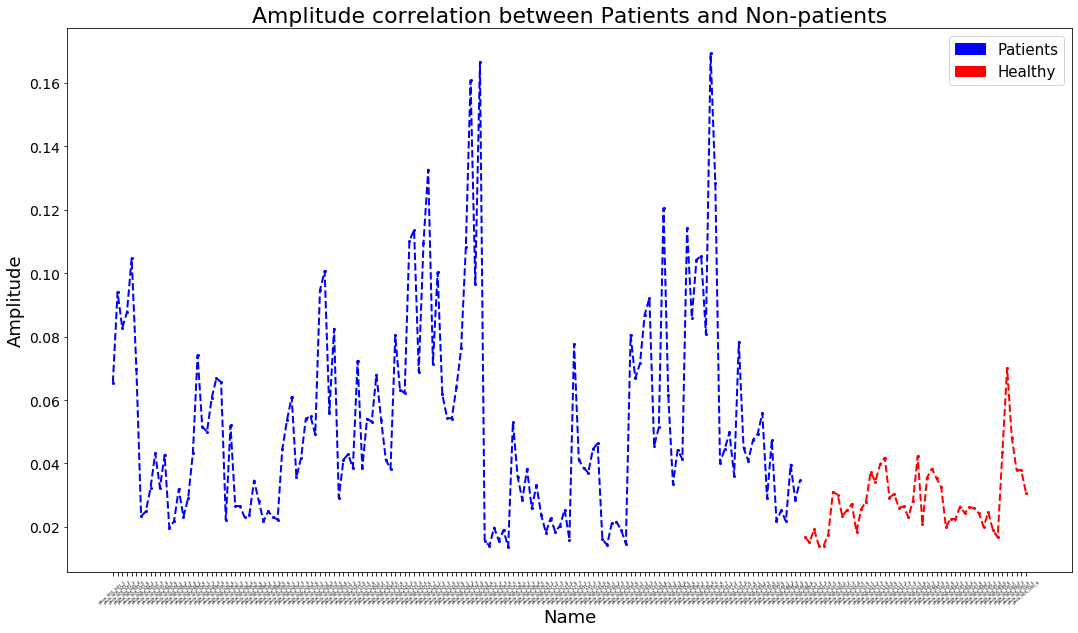

In [23]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['Shimmer:DDA'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['Shimmer:DDA'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('Amplitude', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Amplitude correlation between Patients and Non-patients', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

### Noise to Tonal Component of Patients & Non-patients 

In [24]:
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

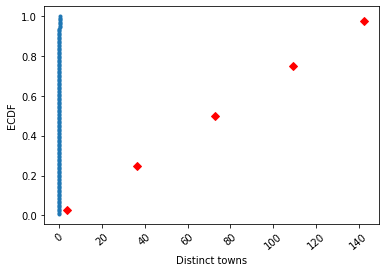

In [25]:
x_values, y_values = ecdf(parkinson_patient['NHR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('ECDF', fontsize=10)
_ = plt.yticks(fontsize = 10)

# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ppn_ptiles_towns = np.percentile(range(len(parkinson_patient['NHR'])), percentiles)
_ = plt.plot(ppn_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


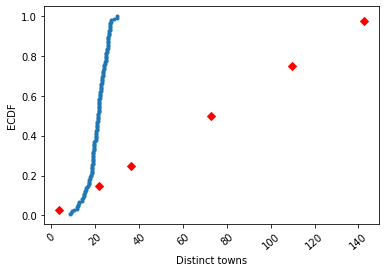

In [26]:
x_values, y_values = ecdf(parkinson_patient['HNR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('ECDF', fontsize=10)
_ = plt.yticks(fontsize = 10)

# Overlay percentiles as red x's
percentiles = np.array([2.5, 15, 25, 50, 75, 97.5])
pph_ptiles_towns = np.percentile(range(len(parkinson_patient['HNR'])), percentiles)
_ = plt.plot(pph_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


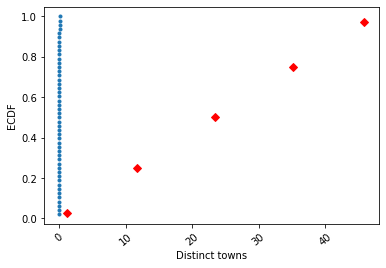

In [27]:
x_values, y_values = ecdf(parkinson_healthy['NHR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('ECDF', fontsize=10)
_ = plt.yticks(fontsize = 10)


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
phn_ptiles_towns = np.percentile(range(len(parkinson_healthy['NHR'])), percentiles)
_ = plt.plot(phn_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


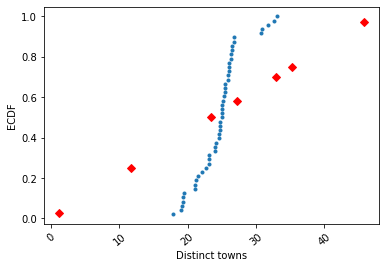

In [28]:
x_values, y_values = ecdf(parkinson_healthy['HNR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('ECDF', fontsize=10)
_ = plt.yticks(fontsize = 10)


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 58, 70, 75, 97.5])
phh_ptiles_towns = np.percentile(range(len(parkinson_healthy['HNR'])), percentiles)
_ = plt.plot(phh_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')

#### Confirming hypothesis with a line plot

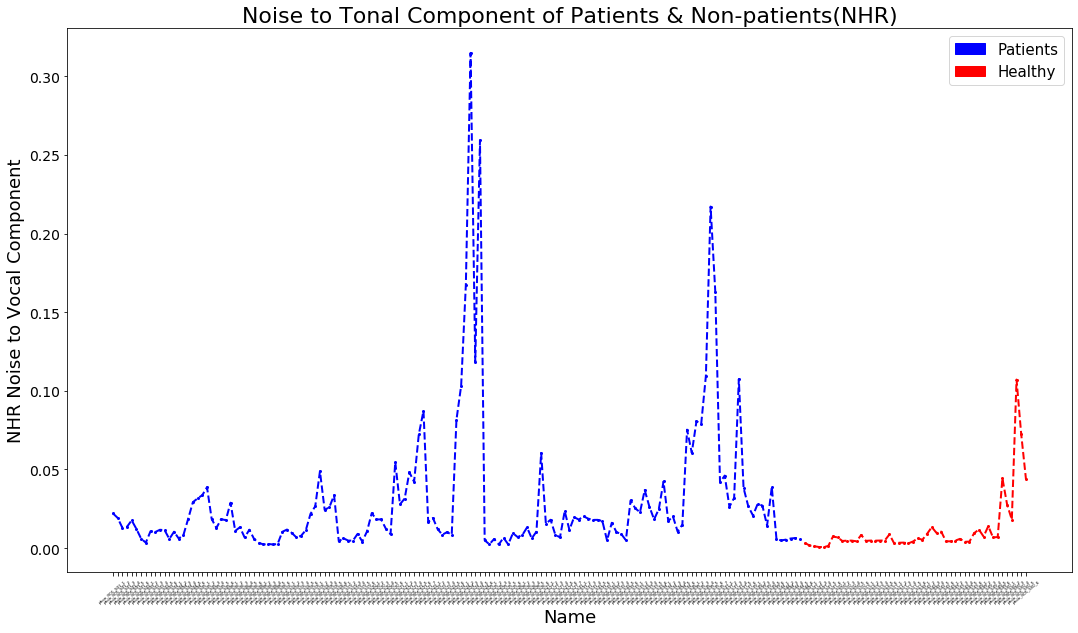

In [29]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['NHR'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['NHR'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('NHR Noise to Vocal Component', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Noise to Tonal Component of Patients & Non-patients(NHR)', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

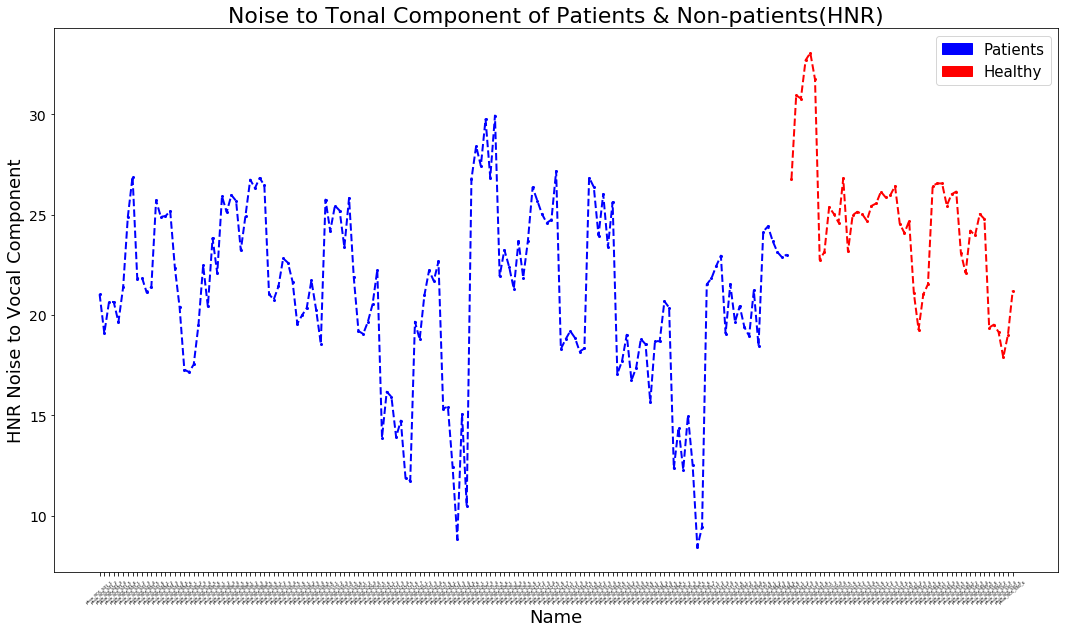

In [30]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['HNR'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['HNR'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('HNR Noise to Vocal Component', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Noise to Tonal Component of Patients & Non-patients(HNR)', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

# ML model

### Logistic Regression

In [63]:
X = data.drop(['status','name'], axis = 1)
y = data['status']

In [64]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [66]:
logreg = LogisticRegression()

In [67]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
logreg.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [69]:
logreg.score(X_test, y_test)

0.9230769230769231

### Gradient Boosting

In [31]:
X = data.drop(['status','name'], axis = 1)
y = data['status']

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [45]:
gb = GradientBoostingClassifier(n_estimators = 500, max_depth = 1, random_state = 52)

In [46]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=52, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
gb.score(X_test, y_test)

0.9230769230769231